## Quickstart for beginners

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 60k training images, 10k test images
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(f"x_train.shape {x_test.shape}  y_train.shape {y_train.shape}")

# build the model by stacking layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()

# This loss is equal to the negative log probability of the true class: 
# It is zero if the model is sure of the correct class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".
model.evaluate(x_test, y_test, verbose=2)

# If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it.
probability_model = tf.keras.Sequential([model, 
                                        tf.keras.layers.Softmax()])
probability_model(x_test[:5])

x_train.shape (10000, 28, 28)  y_train.shape (60000,)


array([[-0.5069309 , -0.6057932 , -0.45132285,  0.26603884,  0.41279095,
         0.25609252, -0.7546308 , -0.4891444 , -0.08155087,  0.7438808 ]],
      dtype=float32)

array([[0.06022474, 0.05455563, 0.06366859, 0.1304582 , 0.15107931,
        0.12916707, 0.04701108, 0.06130551, 0.0921542 , 0.21037568]],
      dtype=float32)

2.0466487

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8604
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1503 - accuracy: 0.9544
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9776


313/313 - 0s - loss: 0.0755 - accuracy: 0.9760


[0.07549391686916351, 0.9760000109672546]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.6724374e-08, 1.4927188e-08, 1.4401066e-06, 2.3391943e-04,
        7.4528750e-10, 8.7936769e-08, 6.8236429e-16, 9.9976248e-01,
        3.1541859e-07, 1.6840055e-06],
       [2.6429519e-09, 5.5893004e-05, 9.9994278e-01, 9.9292197e-07,
        4.0200912e-14, 3.4788027e-07, 2.3661506e-09, 2.3130345e-11,
        4.2575645e-09, 5.1782688e-14],
       [7.5320308e-08, 9.9894756e-01, 6.0037651e-06, 3.0707220e-06,
        3.5968522e-05, 1.7800599e-05, 1.9899680e-06, 9.4670767e-04,
        3.9489343e-05, 1.3367700e-06],
       [9.9561018e-01, 2.1264697e-09, 2.0280395e-05, 6.2676452e-07,
        5.4092141e-07, 1.5927133e-05, 3.0844606e-06, 4.3153623e-03,
        9.2855412e-09, 3.3988967e-05],
       [1.8509558e-05, 8.6893021e-07, 1.6420798e-05, 3.0620825e-07,
        9.9430579e-01, 1.7857607e-06, 1.6527719e-06, 7.8058241e-05,
        2.9633964e-06, 5.5736387e-03]], dtype=float32)>

## Basic Image Classification

2.4.0
x_train.shape 28  x_test.shape (60000,)


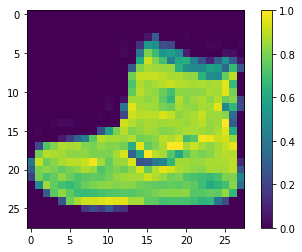

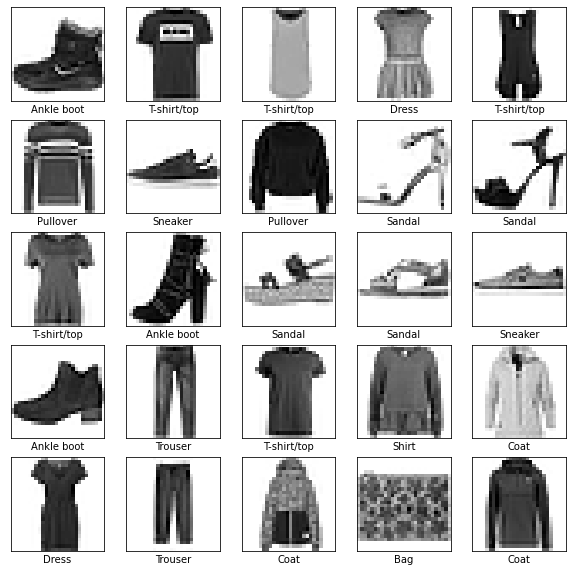

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

# 60k training images, 10k test images
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # numpy ndarray
x_train, x_test = x_train/255.0, x_test/255.0

print(f"x_train.shape {len(x_train[0])}  x_test.shape {y_train.shape}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# visualize
plt.figure();
plt.imshow(x_train[0]);
plt.colorbar();
plt.grid(False);
plt.show();
plt.figure(figsize=(10,10));
for i in range(25):
    plt.subplot(5,5,i+1);
    plt.xticks([]);
    plt.yticks([]);
    plt.grid(False);
    plt.imshow(x_train[i], cmap=plt.cm.binary);
    plt.xlabel(class_names[y_train[i]]);
plt.show();


In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10)])

# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step
# Loss function, optimizer, metrics
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy {test_acc}")

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6384 - accuracy: 0.7781
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3412 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2400 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

313/313 - 0s - loss: 0.3370 - accuracy: 0.8819
Test accuracy 0.8819000124931335


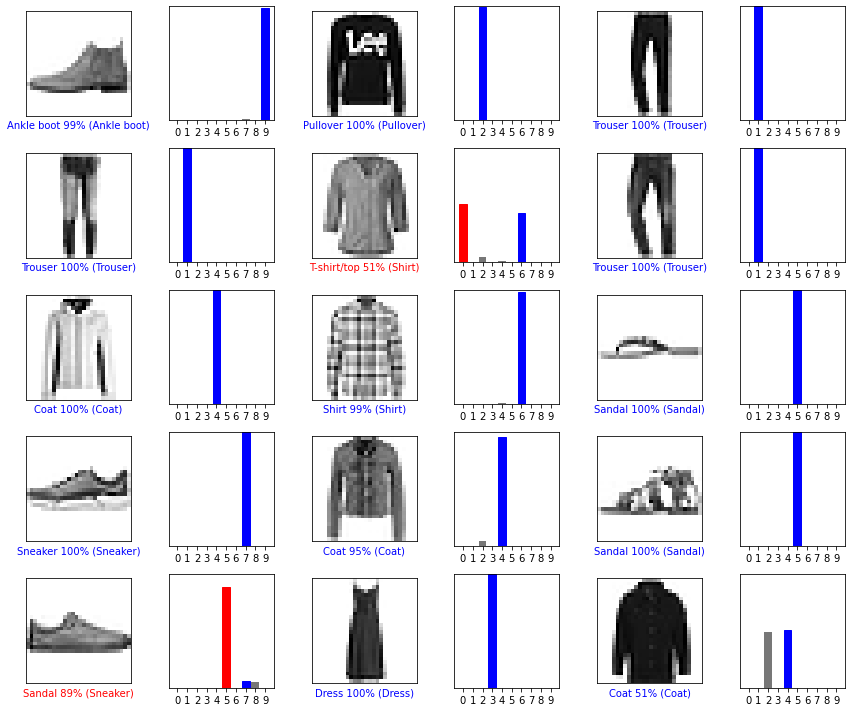

In [4]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
predictions[0]
predictions.shape

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  # Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1);
  plot_image(i, predictions[i], y_test, x_test);
  plt.subplot(num_rows, 2*num_cols, 2*i+2);
  plot_value_array(i, predictions[i], y_test);
plt.tight_layout();
plt.show();